In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import date, time, datetime
!pip install texthero
import nltk
nltk.download('all')

     |████████████████████████████████| 241 kB 9.5 MB/s 
     |████████████████████████████████| 1.5 MB 41.8 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Sem Eval Data in CSV format

In [ ]:
df = pd.read_csv('/content/ABSA16_Restaurants_Train_English_SB2.csv')
df=df.fillna(method='ffill')     #NAN convert to upper id here
df.head()


,rid,sentences__sentence__id,sentences__sentence__text,Opinions__Opinion__category,Opinions__Opinion__polarity
0,1004293,1004293:0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,negative
1,1004293,1004293:1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,negative
2,1004293,1004293:2,"They never brought us complimentary noodles, i...",FOOD#QUALITY,negative
3,1004293,1004293:3,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,negative
4,1004293,1004293:4,"After all that, they complained to me about th...",FOOD#STYLE_OPTIONS,negative


In [ ]:
df1=df.copy()
df1.groupby(['rid'])
df1

,rid,sentences__sentence__id,sentences__sentence__text,Opinions__Opinion__category,Opinions__Opinion__polarity
0,1004293,1004293:0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,negative
1,1004293,1004293:1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,negative
2,1004293,1004293:2,"They never brought us complimentary noodles, i...",FOOD#QUALITY,negative
3,1004293,1004293:3,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,negative
4,1004293,1004293:4,"After all that, they complained to me about th...",FOOD#STYLE_OPTIONS,negative
...,...,...,...,...,...
2033,493013,493013:2,I LOVE their Thai,RESTAURANT#PRICES,positive
2034,493013,493013:3,noodles with shrimp and chicken and coconut ju...,FOOD#QUALITY,positive
2035,493013,493013:4,"I was in love with Pongsri on 48th, but compar...",AMBIENCE#GENERAL,positive
2036,493013,493013:5,I will go back to Suan soon!,SERVICE#GENERAL,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rid                          2038 non-null   object
 1   sentences__sentence__id      2038 non-null   object
 2   sentences__sentence__text    2038 non-null   object
 3   Opinions__Opinion__category  2038 non-null   object
 4   Opinions__Opinion__polarity  2038 non-null   object
dtypes: object(5)
memory usage: 79.7+ KB


In [ ]:
a=[]
for i in range(len(df)):
  x=df['rid'].iloc[i]
  if( x not in a):
    a.append(x)

len(a)
  
  

335

## Reviews

In [ ]:
j=0
txt_lst=[]

for j in range(len(a)):
  sent=''
  y=a[j]
  for i in range(len(df)):
    x=df['rid'].iloc[i]
    if (x==y):
      sent=sent+' ' +df['sentences__sentence__text'].iloc[i]
  txt_lst.append(sent)
len(txt_lst)

335

## Random Review Check

In [ ]:
txt_lst[0]

' Judging from previous posts this used to be a good place, but not any longer. We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude. They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table. The food was lousy - too sweet or too salty and the portions tiny. After all that, they complained to me about the small tip. Avoid this place!'

In [ ]:
#  df['name'].unique()

In [ ]:
df.columns

Index(['rid', 'sentences__sentence__id', 'sentences__sentence__text',
       'Opinions__Opinion__category', 'Opinions__Opinion__polarity'],
      dtype='object')

In [ ]:
df1=df[['rid','sentences__sentence__text','Opinions__Opinion__category', 'Opinions__Opinion__polarity']]
df1=df1.rename(columns={'sentences__sentence__text':'review'})

In [ ]:
data=df.copy()
df=df1.copy()

In [ ]:
df

,rid,review,Opinions__Opinion__category,Opinions__Opinion__polarity
0,1004293,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL,negative
1,1004293,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL,negative
2,1004293,"They never brought us complimentary noodles, i...",FOOD#QUALITY,negative
3,1004293,The food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,negative
4,1004293,"After all that, they complained to me about th...",FOOD#STYLE_OPTIONS,negative
...,...,...,...,...
2033,493013,I LOVE their Thai,RESTAURANT#PRICES,positive
2034,493013,noodles with shrimp and chicken and coconut ju...,FOOD#QUALITY,positive
2035,493013,"I was in love with Pongsri on 48th, but compar...",AMBIENCE#GENERAL,positive
2036,493013,I will go back to Suan soon!,SERVICE#GENERAL,positive


In [ ]:
import spacy
from tqdm import tqdm
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 6.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
df['review']=df['review'].astype(str)


In [ ]:
import nltk
from nltk.corpus import stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######

nlp=spacy.load("en_core_web_sm") 

from textblob import TextBlob # TextBlob - Python library for processing textual data
import random
np.random.seed(0)


# import string library function 
import string 

In [ ]:
df['raw_review']=df['review']

## Abbreviation Handling / Shortcut

In [ ]:
punctuation_lst =['.','!',',',':',';','?']
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    ###############
    "nyc" : "nice",               
    "gd" :  "good",
    "fyn" : "fine",               
  

    '\s+':' ', # replace multi space with one single space
}

In [ ]:
def process_data(data):
    
    data.review=data.review.str.lower() # conver to lower case

    data.review=data.review.astype(str)
   
    data.replace(abbr_dict,regex=True,inplace=True)
  
    return data

process_data(df)
df.head()

,rid,review,Opinions__Opinion__category,Opinions__Opinion__polarity,raw_review
0,1004293,judging from previous posts this used to be a ...,RESTAURANT#GENERAL,negative,Judging from previous posts this used to be a ...
1,1004293,"we, there were four of us, arrived at noon - t...",SERVICE#GENERAL,negative,"We, there were four of us, arrived at noon - t..."
2,1004293,"they never brought us complimentary noodles, i...",FOOD#QUALITY,negative,"They never brought us complimentary noodles, i..."
3,1004293,the food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,negative,The food was lousy - too sweet or too salty an...
4,1004293,"after all that, they complained to me about th...",FOOD#STYLE_OPTIONS,negative,"After all that, they complained to me about th..."


# Lower Casing and removal of numeric value

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def pre_process(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  rem_num = re.sub('[0-9]+', '',sentence)
  
  
  return rem_num


df['clean_review']= df['review'].apply(pre_process)
txt='Nice hotel with very friendly and helpful staff. Nice hotel , with very friendly staff and helpful - great choice for breakfast , something for everyone.'
pre_process(txt)



'nice hotel with very friendly and helpful staff. nice hotel , with very friendly staff and helpful - great choice for breakfast , something for everyone.'

In [ ]:
df.drop_duplicates(subset=['clean_review'], keep='last')
df.shape

(2038, 6)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Sorting Unique Words 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords1(txt):
  rvm_stpwords = [i for i in txt.split() if i not in stop_words]
  rmv_stpwords_join = ' '.join(rvm_stpwords)
  return rmv_stpwords_join


hotels= df['clean_review'].apply(remove_stopwords1) 
hotels = [line.replace("\n", "") for line in hotels]



def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ------

    """
    
    
    vec = CountVectorizer().fit(corpus) #get a Bag of Word model that has cleaned the text, removing non-aphanumeric characters and stop words.
    bag_of_words = vec.transform(corpus) #bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary
    # bag_of_words[i,j] is the occurrence of word j in the text i.

    sum_words = bag_of_words.sum(axis=0)  #sum_words is a vector that contains the sum of each word occurrence in all texts in the corpus
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_words = get_top_n_words(hotels,20000)
# for word, freq in common_words:
#     print(word, freq)
cmn_word_df = pd.DataFrame(common_words,columns=['words','count'])
cmn_word_df

,words,count
0,food,288
1,place,226
2,great,200
3,good,188
4,service,169
...,...,...
3205,college,1
3206,students,1
3207,coconut,1
3208,pongsri,1


## top 20 Words 

Text(0, 0.5, 'Count')

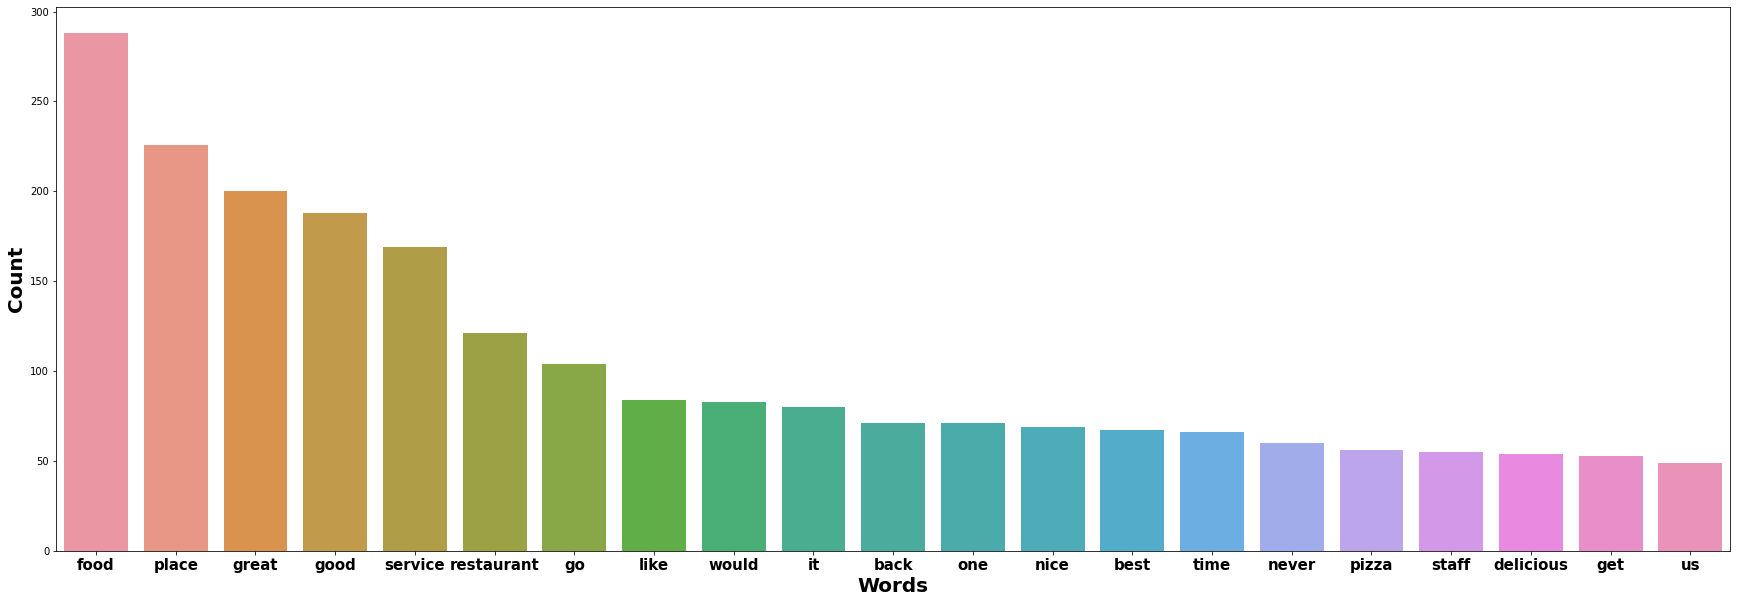

In [ ]:
cmn_word_df=cmn_word_df[:21]
import seaborn 
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(30, 10))

tidy = cmn_word_df.melt(id_vars='words').rename(columns=str.title)
ax=seaborn.barplot(x=cmn_word_df['words'], y='Value',  data=tidy, ax=ax1 )
        
plt.xticks(fontsize=15, weight="bold")   
plt.xlabel("Words",fontsize=20,weight='bold')
plt.ylabel("Count",fontsize=20,weight='bold')           

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Extra Expression Handling (soooo gooooddd)

In [ ]:
import re
def extra_expression(txt):          #for shortcut words fuction
  txt= str(txt)
  txt=txt+ ' '
  txt=re.sub('so+(?=[^a-z])','so ',txt)
  txt=re.sub('goo+d+(?=[^a-z])','good ',txt)
  txt=re.sub('wo+w+(?=[^a-z])','wow ',txt)
  txt=re.sub('nice+(?=[^a-z])','nice ',txt)
  txt=re.sub('fine+(?=[^a-z])','fine ',txt)
  txt=re.sub('lovely+(?=[^a-z])','lovely ',txt)
  txt=re.sub('very+(?=[^a-z])','very ',txt)
  txt=re.sub('ba*d+(?=[^a-z])','bad ',txt)
  txt=re.sub('lo+ve*(?=[^a-z])','love ',txt)
  txt=re.sub('\s+', ' ', txt)
  return txt


## Random check for extra expression

In [ ]:
txt1="it is soooo goooooodddd"
extra_expression(txt1)

'it is so good '

In [ ]:

for i,txt in enumerate(df['clean_review']):
  df['clean_review'].iloc[i]=extra_expression(txt)


# Random check the dependency and parts of speech

In [ ]:
txt =  "pizza was a little soggy"

nlp=spacy.load("en_core_web_sm")  #Load the small English model
doc = nlp(txt)  # Process a text
spacy.displacy.render(doc,style='dep',jupyter=True)

## test manual review

In [ ]:

txt1=['the food is lossy and too salty', 'hotel is good and has helpful staff','The touchscreen is smooth but the battery life is not good',
      'The laptop is heavy to carry']
rid=[1,2,3,4]
df_22=pd.DataFrame(
    {
        'clean_review': txt1,
     'rid':rid
    }
)

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform(df_22['clean_review'])
x=result.toarray()
y=tfidf.vocabulary_
df_22

,clean_review,rid
0,the food is lossy and too salty,1
1,hotel is good and has helpful staff,2
2,The touchscreen is smooth but the battery life...,3
3,The laptop is heavy to carry,4


In [ ]:
#experiment for get not                              final updated compound noun
prn_lst=['it', 'this', 'that']
aspects_main = []
feature_main =[]
feautures_term_main =[]
aspects = []
feature =[]
feautures_term =[]
raw_txt=[]
weight=[]
a=df_22['rid'].iloc[0]
prev_target=''

for value,txt in enumerate( df_22['clean_review']):
  rid = df_22['rid'].iloc[value]
 

    
  if (rid==a):
    a=rid
    
  elif (rid != a):
    prev_target=''
 
  
  txt=str(txt)
  sentence=str(txt)
  print(sentence)
  doc_main = nlp(txt)
  for i, sentence in enumerate(doc_main.sents):
    sentence=str(sentence)
    sentence= re.split(r'([.,;:-])|\s+(?:but|and|or|that|if|because|with)\s+' ,sentence) 
    # the food is salty 
    # too losy
    flag_target=0
    
    for sent in sentence:
      sent=str(sent)
     
      doc = nlp(sent)
      
    
      if flag_target==0:
        target = ''
      
      opinion_term = ''
      add_neg_pfx = False
      count_punct=0
      flag_punct=0
      for token in doc:
        if (flag_punct==0):
          for tok in doc:
            if(tok.is_punct):
              if (tok.text == "!"): #hotel is good!!!
                count_punct =count_punct + 1      #3
                flag_punct=1
        if  (token.dep_ == 'nsubj' and token.pos_=='NOUN') or (token.pos_=='NOUN') or (token.pos_=='PROPN') :
          compound_flag=0
          for token in [token for token in doc if token.dep_ == 'compound' ]: # Get list of compounds in doc
            if(doc[token.head.i].pos_ =='NOUN') or (doc[token.head.i].pos_=='PROPN'):
              noun = doc[token.i: token.head.i + 1]
              compound_flag=1
            else:
              noun= token
          
          if (compound_flag):
            target=str(noun)
          else:
            target=token.text

          for j in token.children:
            if (j.pos_=='ADJ'):           ########################               
              prepend = ''
              flag=0 
              opinion_term=j.text
              
              for child in j.children:       ### have no child here 
                if (child.dep_=='neg'):
                  flag=1
                elif (child.pos_ != 'ADV' ): #and child.is_left_punct!=True
                  continue
                prepend += child.text + ' '
                if (flag==0):
                  opinion_term = prepend + opinion_term
                elif (flag==1):
                  opinion_term = prepend + opinion_term
                else:
                  opinion_term=opinion_term
                  
              if ((target=='') or (opinion_term=='')):
                continue
              else: 
                if (flag_punct):            #############                     add punct "!"
                  for i in range(count_punct):
                    opinion_term=opinion_term + '!'
                aspects.append({'aspect': target, 'opinion': opinion_term})
                feautures_term.append(opinion_term)
                feature.append(target)
                raw_txt.append(sent)
                prev_target=target
                z=y.get(target)
                weight.append(x[value][z])

            elif (j.dep_ is 'amod' and j.pos_ is 'ADJ') :    #primary condition
              opinion_term =j.text
              for k in j.lefts:
                if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                  opinion_term=k.text+' '+opinion_term
              if ((target=='') or (opinion_term=='')):
                continue
              else: 
                if (flag_punct):            #############                     add punct "!"
                  for i in range(count_punct):
                    opinion_term=opinion_term + '!'
                aspects.append({'aspect': target, 'opinion': opinion_term})
                feautures_term.append(opinion_term)
                feature.append(target)
                raw_txt.append(sent)
                prev_target=target
                z=y.get(target)
                weight.append(x[value][z])

        if(token.pos_ == 'PRON' and token.is_sent_start and token.text in prn_lst):
          target=prev_target
          

        if (token.dep_=='neg'):   #for negative
          neg_prefix = 'not'
          add_neg_pfx = True #flag

          
          # for child in doc:
          #   if (child.pos_ == 'NOUN'):
          #     target=child.text
          #     print(target)
              
          #   if (child.pos_ != "ADJ" ):
          #     for child in doc:
          #       if(target):
          #         opinion_term= neg_prefix
                
          # if (flag_punct):            #############                     add punct "!"
          #   for i in range(count_punct):
          #     opinion_term=opinion_term + '!' 
          # aspects.append({'aspect': target, 'opinion': opinion_term})
          # feautures_term.append(opinion_term)
          # feature.append(target)
          # raw_txt.append(sent)
          # prev_target=target
          # print(opinion_term)


              
            
        
            

        if (token.pos_=='ADJ'):  #too losy
          if (token.is_sent_start):
            for tok1 in doc:
              if (tok1.pos_=='NOUN' or tok1.pos_=='PROPN'):
                target=tok1.text
              else:
                target=prev_target

             
          prepend=''
          for child in token.children:
            if (child.pos_=='ADV' and child.is_sent_start):
              target=prev_target
            if (child.pos_=='ADJ' and child.dep_ is 'amod'):
              prepend += child.text+' '
              
            if (child.pos_ != 'ADV'):
              continue
            
            prepend += child.text + ' '

            
          opinion_term = prepend + token.text      

          if (add_neg_pfx): #if(True)
            opinion_term = neg_prefix +' '+ opinion_term    #not very good
          else:
            opinion_term = opinion_term   #very good
            
          if ((target=='') or (opinion_term=='')):
            continue
          else: 
            if (flag_punct):            #############       add punct "!"
              for i in range(count_punct): #good
                opinion_term=opinion_term + '!' #good!!!
            aspects.append({'aspect': target, 'opinion': opinion_term})
            feautures_term.append(opinion_term)
            feature.append(target)
            raw_txt.append(sent)
            prev_target=target
            z=y.get(target)
            weight.append(x[value][z])
        

print(aspects)


the food is lossy and too salty
hotel is good and has helpful staff
The touchscreen is smooth but the battery life is not good
The laptop is heavy to carry
[{'aspect': 'food', 'opinion': 'lossy'}, {'aspect': 'food', 'opinion': 'too salty'}, {'aspect': 'hotel', 'opinion': 'good'}, {'aspect': 'staff', 'opinion': 'helpful'}, {'aspect': 'touchscreen', 'opinion': 'smooth'}, {'aspect': 'battery life', 'opinion': 'not good'}, {'aspect': 'laptop', 'opinion': 'heavy'}]


# TF-IDF

In [ ]:

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform(df['clean_review'])
x=result.toarray()
y=tfidf.vocabulary_

In [ ]:
df

,rid,review,Opinions__Opinion__category,Opinions__Opinion__polarity,raw_review,clean_review
0,1004293,judging from previous posts this used to be a ...,RESTAURANT#GENERAL,negative,Judging from previous posts this used to be a ...,judging from previous posts this used to be a ...
1,1004293,"we, there were four of us, arrived at noon - t...",SERVICE#GENERAL,negative,"We, there were four of us, arrived at noon - t...","we, there were four of us, arrived at noon - t..."
2,1004293,"they never brought us complimentary noodles, i...",FOOD#QUALITY,negative,"They never brought us complimentary noodles, i...","they never brought us complimentary noodles, i..."
3,1004293,the food was lousy - too sweet or too salty an...,FOOD#STYLE_OPTIONS,negative,The food was lousy - too sweet or too salty an...,the food was lousy - too sweet or too salty an...
4,1004293,"after all that, they complained to me about th...",FOOD#STYLE_OPTIONS,negative,"After all that, they complained to me about th...","after all that, they complained to me about th..."
...,...,...,...,...,...,...
2033,493013,i love their thai,RESTAURANT#PRICES,positive,I LOVE their Thai,i love their thai
2034,493013,noodles with shrimp and chicken and coconut ju...,FOOD#QUALITY,positive,noodles with shrimp and chicken and coconut ju...,noodles with shrimp and chicken and coconut ju...
2035,493013,"i was in love with pongsri on 48th, but compar...",AMBIENCE#GENERAL,positive,"I was in love with Pongsri on 48th, but compar...","i was in love with pongsri on th, but compared..."
2036,493013,i will go back to suan soon!,SERVICE#GENERAL,positive,I will go back to Suan soon!,i will go back to suan soon!


## Aspect and Opinion Output 

In [ ]:
#experiment for get not                              final updated compound noun
prn_lst=['it', 'this', 'that']
aspects_main = []
feature_main =[]
feautures_term_main =[]
aspects = []
feature =[]
feautures_term =[]
raw_txt=[]
weight=[]
a=df['rid'].iloc[0]
prev_target=''
for value,txt in enumerate( df['clean_review']):
  rid = df['rid'].iloc[value]
 
  if (rid==a):
    a=rid
    
  elif (rid != a):
    prev_target=''
  
  
  txt=str(txt)
  doc_main = nlp(txt)
  for i, sentence in enumerate(doc_main.sents):
    sentence=str(sentence)
    sentence= re.split(r'([.,;:-])|\s+(?:but|and|or|that|if|because|with)\s+' ,sentence) 
    # the food is salty 
    # too losy
    flag_target=0
    for sent in sentence:
      sent=str(sent)
     
      doc = nlp(sent)
      
   
      if flag_target==0:
        target = ''
      
      opinion_term = ''
      add_neg_pfx = False
      count_punct=0
      flag_punct=0
      for token in doc:
        if (flag_punct==0):
          for tok in doc:
            if(tok.is_punct):
              if (tok.text == "!"): #hotel is good!!!
                count_punct =count_punct + 1      #3
                flag_punct=1
        if  (token.dep_ == 'nsubj' and token.pos_=='NOUN') or (token.pos_=='NOUN') or (token.pos_=='PROPN') :
          compound_flag=0
          for token in [token for token in doc if token.dep_ == 'compound' ]: # Get list of compounds in doc
            if(doc[token.head.i].pos_ =='NOUN') or (doc[token.head.i].pos_=='PROPN'):
              noun = doc[token.i: token.head.i + 1]
              compound_flag=1
            else:
              noun= token
          
          if (compound_flag):
            target=str(noun)
          else:
            target=token.text

          for j in token.children:
            if (j.pos_=='ADJ'):           ########################               
              prepend = ''
              flag=0 
              opinion_term=j.text
              
              for child in j.children:       ### have no child here 
                if (child.dep_=='neg'):
                  flag=1
                elif (child.pos_ != 'ADV' ): #and child.is_left_punct!=True
                  continue
                prepend += child.text + ' '
                if (flag==0):
                  opinion_term = prepend + opinion_term
                elif (flag==1):
                  opinion_term = prepend + opinion_term
                else:
                  opinion_term=opinion_term
                  
              if ((target=='') or (opinion_term=='')):
                continue
              else: 
                if (flag_punct):            #############                     add punct "!"
                  for i in range(count_punct):
                    opinion_term=opinion_term + '!'
                aspects.append({'aspect': target, 'opinion': opinion_term})
                feautures_term.append(opinion_term)
                feature.append(target)
                raw_txt.append(sent)
                prev_target=target
                z=y.get(target)
                weight.append(x[value][z])

            elif (j.dep_ is 'amod' and j.pos_ is 'ADJ') :    #primary condition
              opinion_term =j.text
              for k in j.lefts:
                if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                  opinion_term=k.text+' '+opinion_term
              if ((target=='') or (opinion_term=='')):
                continue
              else: 
                if (flag_punct):            #############                     add punct "!"
                  for i in range(count_punct):
                    opinion_term=opinion_term + '!'
                aspects.append({'aspect': target, 'opinion': opinion_term})
                feautures_term.append(opinion_term)
                feature.append(target)
                raw_txt.append(sent)
                prev_target=target
                z=y.get(target)
                weight.append(x[value][z])

        if(token.pos_ == 'PRON' and token.is_sent_start and token.text in prn_lst):
          target=prev_target
          

        if (token.dep_=='neg'):   #for negative
          neg_prefix = 'not'
          add_neg_pfx = True #flag

          
          # for child in doc:
          #   if (child.pos_ == 'NOUN'):
          #     target=child.text
          #     print(target)
              
          #   if (child.pos_ != "ADJ" ):
          #     for child in doc:
          #       if(target):
          #         opinion_term= neg_prefix
                
          # if (flag_punct):            #############                     add punct "!"
          #   for i in range(count_punct):
          #     opinion_term=opinion_term + '!' 
          # aspects.append({'aspect': target, 'opinion': opinion_term})
          # feautures_term.append(opinion_term)
          # feature.append(target)
          # raw_txt.append(sent)
          # prev_target=target
          # print(opinion_term)


              
            
        
            

        if (token.pos_=='ADJ'):  #too losy
          if (token.is_sent_start):
            target=prev_target #food
          prepend=''
          for child in token.children:
            if (child.pos_=='ADV' and child.is_sent_start):
              target=prev_target
            if (child.pos_=='ADJ' and child.dep_ is 'amod'):
              prepend += child.text+' '
              
            if (child.pos_ != 'ADV'):
              continue
            
            prepend += child.text + ' '

            
          opinion_term = prepend + token.text      

          if (add_neg_pfx): #if(True)
            opinion_term = neg_prefix +' '+ opinion_term    #not very good
          else:
            opinion_term = opinion_term   #very good
            
          if ((target=='') or (opinion_term=='')):
            continue
          else: 
            if (flag_punct):            #############       add punct "!"
              for i in range(count_punct): #good
                opinion_term=opinion_term + '!' #good!!!
            aspects.append({'aspect': target, 'opinion': opinion_term})
            feautures_term.append(opinion_term)
            feature.append(target)
            raw_txt.append(sent)
            prev_target=target
            z=y.get(target)
            weight.append(x[value][z])
        

        


       
print(aspects)
#  Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, 
#  because it was so great! Service was devine, oysters where a sensual as they come, 
#  and the price can't be beat!!! You can't go wrong here. You can't go wrong here.

[{'aspect': 'posts', 'opinion': 'previous'}, {'aspect': 'posts', 'opinion': 'good'}, {'aspect': 'place', 'opinion': 'good'}, {'aspect': 'place', 'opinion': 'empty'}, {'aspect': 'noodles', 'opinion': 'complimentary'}, {'aspect': 'food', 'opinion': 'lousy'}, {'aspect': 'food', 'opinion': 'too salty'}, {'aspect': 'portions', 'opinion': 'tiny'}, {'aspect': 'tip', 'opinion': 'small'}, {'aspect': 'times', 'opinion': 'many'}, {'aspect': 'smith street', 'opinion': 'best'}, {'aspect': 'duck confit', 'opinion': 'amazing'}, {'aspect': 'wine list', 'opinion': 'interesting'}, {'aspect': 'values', 'opinion': 'many'}, {'aspect': 'values', 'opinion': 'good'}, {'aspect': 'service', 'opinion': 'devine'}, {'aspect': 'service', 'opinion': 'excellent'}, {'aspect': 'decor', 'opinion': 'cool'}, {'aspect': 'decor', 'opinion': 'understated'}, {'aspect': 'breast', 'opinion': 'special'}, {'aspect': 'breast', 'opinion': 'last'}, {'aspect': 'breast', 'opinion': 'incredible'}, {'aspect': 'visit', 'opinion': 'next'}

In [ ]:
txt_lst[0]

' Judging from previous posts this used to be a good place, but not any longer. We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude. They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table. The food was lousy - too sweet or too salty and the portions tiny. After all that, they complained to me about the small tip. Avoid this place!'

In [ ]:
txt =  "Avoid this place!"
txt1='No Parking'

nlp=spacy.load("en_core_web_sm")  #Load the small English model
doc = nlp(txt)  # Process a text
spacy.displacy.render(doc,style='dep',jupyter=True)

In [ ]:
aspects = list(filter(None, aspects))

In [ ]:
# aspects

In [ ]:
#preprocess

In [ ]:
print(len(feautures_term))
print(len(feature))
print(len(aspects))
print(len(raw_txt))
len(weight)

2522
2522
2522
2522


2522

## Create Dataframe (all aspect and opinion) 

In [ ]:
#unique dataframe of all aspect 
data= pd.DataFrame({
    'aspect_opinion_pair': aspects,
    'raw_clean_text': raw_txt,
    'weight':weight
}
)
data.head()

,aspect_opinion_pair,raw_clean_text,weight
0,"{'aspect': 'posts', 'opinion': 'previous'}",judging from previous posts this used to be a ...,0.402259
1,"{'aspect': 'posts', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.402259
2,"{'aspect': 'place', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.163964
3,"{'aspect': 'place', 'opinion': 'empty'}",the place was empty,0.118972
4,"{'aspect': 'noodles', 'opinion': 'complimentary'}",they never brought us complimentary noodles,0.28477


## Category

In [ ]:
#prededined aspects
location=['location','view','views', 'transport', 'tickets','night', 'taxis', 'area', 'stations','places','terminal','sunsets','morning','nights','reach']
food=['breakfast','sausage', 'bacon', 'eggs', 'brits','breakfasts', 'spread','food','dinner','foods']
service=['staff',  'side','receptionist','reception','feature','service','desk']
comfort_failities = ['rooms','shower', 'light', 'airy', 'rooms', 'windows','beds','room','sleeping','floor', 'ceiling','facility','walls','bedroom',
                     'doors','facilities','bathroom', 'door','air', 'conditioning','roof','boat','water', 'bus','internet', 'wifi']

experience=['hotel','hotels','restaurants', 'bars','atmosphere','quality']
cost=['money','value','price','bills','pleasant','prices']

In [ ]:
len(data)

2522

In [ ]:
data_new= data.copy()#copy 
# data=data[:5]
data

,aspect_opinion_pair,raw_clean_text,weight
0,"{'aspect': 'posts', 'opinion': 'previous'}",judging from previous posts this used to be a ...,0.402259
1,"{'aspect': 'posts', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.402259
2,"{'aspect': 'place', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.163964
3,"{'aspect': 'place', 'opinion': 'empty'}",the place was empty,0.118972
4,"{'aspect': 'noodles', 'opinion': 'complimentary'}",they never brought us complimentary noodles,0.28477
...,...,...,...
2517,"{'aspect': 'location', 'opinion': 'good'}",its location is good,0.229951
2518,"{'aspect': 'prices', 'opinion': 'very reasonab...",their prices are very reasonable,0.178384
2519,"{'aspect': 'suan', 'opinion': 'slow'}",compared to suan it is slow in service,0.327018
2520,"{'aspect': 'terrace', 'opinion': 'great!!!'}",eat outside on a terrace (another great featur...,0.401436


In [ ]:
def find_category(word):
  if word in food:
    return 'food'
  elif (word in location):
    return 'location'
  elif (word in service):
    return 'service'
  elif (word in cost):
    return 'cost'
  elif word in comfort_failities:
    return 'comfort and facilities'
  
  elif word in experience:
    return 'overall experience'
  else:
    return 'others'

## TextBlob

In [ ]:
def get_text_polarity_TB(txt):
  return TextBlob(txt).sentiment.polarity

Random Check TextBlob score

In [ ]:
print(get_text_polarity_TB('heavy'))


-0.2


In [ ]:
data_copy=data.copy()

In [ ]:
category=[]
polarity_TB=[]
polarity_VD=[]
aspect=[]
opinion=[]

for j, value in data['aspect_opinion_pair'].items():
  dict=value
  for key1 in dict:
    if (key1=='aspect'):
      a=find_category(dict[key1])
      category.append(a)
      aspect.append(dict[key1])
    elif (key1=='opinion'):
      b=str(dict[key1])
      a=b
      opinion.append(b)

      b=get_text_polarity_TB(b)
      polarity_TB.append(b)
      
    
  
    



In [ ]:
print(len(category))
print(len(opinion))
print(len(polarity_TB))
print(len(aspect))

2522
2522
2522
2522


In [ ]:
data['category']=category
data['opinions_polarity_TB']=polarity_TB
data['aspect']=aspect
data['opinion']=opinion
data

,aspect_opinion_pair,raw_clean_text,weight,category,opinions_polarity_TB,aspect,opinion
0,"{'aspect': 'posts', 'opinion': 'previous'}",judging from previous posts this used to be a ...,0.402259,others,-0.166667,posts,previous
1,"{'aspect': 'posts', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.402259,others,0.700000,posts,good
2,"{'aspect': 'place', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.163964,others,0.700000,place,good
3,"{'aspect': 'place', 'opinion': 'empty'}",the place was empty,0.118972,others,-0.100000,place,empty
4,"{'aspect': 'noodles', 'opinion': 'complimentary'}",they never brought us complimentary noodles,0.28477,others,0.300000,noodles,complimentary
...,...,...,...,...,...,...,...
2517,"{'aspect': 'location', 'opinion': 'good'}",its location is good,0.229951,location,0.700000,location,good
2518,"{'aspect': 'prices', 'opinion': 'very reasonab...",their prices are very reasonable,0.178384,cost,0.260000,prices,very reasonable
2519,"{'aspect': 'suan', 'opinion': 'slow'}",compared to suan it is slow in service,0.327018,others,-0.300000,suan,slow
2520,"{'aspect': 'terrace', 'opinion': 'great!!!'}",eat outside on a terrace (another great featur...,0.401436,others,1.000000,terrace,great!!!


# Sentiwordnet

In [ ]:
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
pos=neg=obj=count=0

postagging = []

for review in data['opinion']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data['senti_score'] = senti_score



In [ ]:
data = data.drop('pos_tags', 1)
data

,aspect_opinion_pair,raw_clean_text,weight,category,opinions_polarity_TB,aspect,opinion,senti_score
0,"{'aspect': 'posts', 'opinion': 'previous'}",judging from previous posts this used to be a ...,0.402259,others,-0.166667,posts,previous,0.00
1,"{'aspect': 'posts', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.402259,others,0.700000,posts,good,0.75
2,"{'aspect': 'place', 'opinion': 'good'}",judging from previous posts this used to be a ...,0.163964,others,0.700000,place,good,0.75
3,"{'aspect': 'place', 'opinion': 'empty'}",the place was empty,0.118972,others,-0.100000,place,empty,0.00
4,"{'aspect': 'noodles', 'opinion': 'complimentary'}",they never brought us complimentary noodles,0.28477,others,0.300000,noodles,complimentary,0.00
...,...,...,...,...,...,...,...,...
2517,"{'aspect': 'location', 'opinion': 'good'}",its location is good,0.229951,location,0.700000,location,good,0.75
2518,"{'aspect': 'prices', 'opinion': 'very reasonab...",their prices are very reasonable,0.178384,cost,0.260000,prices,very reasonable,0.50
2519,"{'aspect': 'suan', 'opinion': 'slow'}",compared to suan it is slow in service,0.327018,others,-0.300000,suan,slow,0.00
2520,"{'aspect': 'terrace', 'opinion': 'great!!!'}",eat outside on a terrace (another great featur...,0.401436,others,1.000000,terrace,great!!!,0.00


In [ ]:
txt =  "great!!!"

nlp=spacy.load("en_core_web_sm")  #Load the small English model
doc = nlp(txt)  # Process a text
spacy.displacy.render(doc,style='dep',jupyter=True)

## Save as a csv file

In [ ]:
data.to_csv('sentiwordnet_data_weight_sem_eval.csv')

## Random Check from the dataframe

In [ ]:
print(data.iloc[2521])

aspect_opinion_pair          {'aspect': 'feature', 'opinion': 'great!!!'}
raw_clean_text          eat outside on a terrace (another great featur...
weight                                                           0.423077
category                                                          service
opinions_polarity_TB                                                    1
aspect                                                            feature
opinion                                                          great!!!
senti_score                                                             0
Name: 2521, dtype: object


In [ ]:
print(data.iloc[2521])#2038,2638

aspect_opinion_pair          {'aspect': 'feature', 'opinion': 'great!!!'}
raw_clean_text          eat outside on a terrace (another great featur...
weight                                                           0.423077
category                                                          service
opinions_polarity_TB                                                    1
aspect                                                            feature
opinion                                                          great!!!
senti_score                                                             0
Name: 2521, dtype: object


In [ ]:
print(data.iloc[8])    #2038

aspect_opinion_pair          {'aspect': 'tip', 'opinion': 'small'}
raw_clean_text           they complained to me about the small tip
weight                                                    0.459469
category                                                    others
opinions_polarity_TB                                         -0.25
aspect                                                         tip
opinion                                                      small
senti_score                                                 -0.375
Name: 8, dtype: object


## CRF

In [ ]:
data2=data.copy()

## Aspect List

In [ ]:
aspect_list= data2['aspect']
aspect_list.tolist()
aspect_list=set(aspect_list)
len(aspect_list)  #total len of aspect (746) 

746

## Opinion List

In [ ]:
opinion_list= data2['opinion']
opinion_list.tolist()
opinion_list=set(opinion_list)
len(opinion_list) #total len of opinion (746) 

712

## Lable words with aspect, opinion and irrelevant

In [ ]:
docs=[]
for i,txt in enumerate(df['clean_review']):
  texts=[]
  for word in txt.split():
    word= re.sub('[.,!]','',word)
    if word in opinion_list:  
      label='O'  #label opinion
    elif word in aspect_list:
      label= 'A' #label aspect
    
    else:
      label= 'I' # label irrelevant
    if len(word)>0:
      texts.append((word,label))
  docs.append(texts)




Random Check the text with label (aspect, opinion, irrelevant)

In [ ]:
print(docs[15])

[('every', 'I'), ('time', 'A'), ('in', 'I'), ('new', 'O'), ('york', 'I'), ('i', 'I'), ('make', 'I'), ('it', 'I'), ('a', 'I'), ('point', 'A'), ('to', 'I'), ('visit', 'A'), ('restaurant', 'A'), ('saul', 'A'), ('on', 'I'), ('smith', 'I'), ('street', 'A')]


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Perform pos tagging 

In [ ]:
import nltk
data22 = []
for i, doc in enumerate(docs):

    # Obtain the list of tokens in the document
    tokens = [t for t, label in doc]

    # Perform POS tagging
    tagged = nltk.pos_tag(tokens)

    # Take the word, POS tag, and its label
    data22.append([(w, pos, label) for (w, label), (word, pos) in zip(doc, tagged)])

## Random Check word, pos tag and label

In [ ]:
data22[0]

[('judging', 'VBG', 'I'),
 ('from', 'IN', 'I'),
 ('previous', 'JJ', 'O'),
 ('posts', 'NNS', 'A'),
 ('this', 'DT', 'I'),
 ('used', 'VBN', 'I'),
 ('to', 'TO', 'I'),
 ('be', 'VB', 'I'),
 ('a', 'DT', 'I'),
 ('good', 'JJ', 'O'),
 ('place', 'NN', 'A'),
 ('but', 'CC', 'I'),
 ('not', 'RB', 'I'),
 ('any', 'DT', 'I'),
 ('longer', 'JJR', 'I')]

## Features of the word(beginning of a document or end of a document and other features)

In [ ]:
def word2features(doc, i):
    word = doc[i][0]
    postag = doc[i][1]

    # Common features for all words
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag
    ]

    # Features for words that are not at the beginning of a document
    if i > 0:
        word1 = doc[i-1][0]
        postag1 = doc[i-1][1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:word.isdigit=%s' % word1.isdigit(),
            '-1:postag=' + postag1
        ])
    else:
        # Indicate that it is the 'beginning of a document'
        features.append('BOS')

    # Features for words that are not at the end of a document
    if i < len(doc)-1:
        word1 = doc[i+1][0]
        postag1 = doc[i+1][1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:word.isdigit=%s' % word1.isdigit(),
            '+1:postag=' + postag1
        ])
    else:
        # Indicate that it is the 'end of a document'
        features.append('EOS')

    return features

## Spliting dataset 80/20

In [ ]:
from sklearn.model_selection import train_test_split

# A function for extracting features in documents
def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc))]

# A function fo generating the list of labels for each document
def get_labels(doc):
    return [label for (token, postag, label) in doc]

X = [extract_features(doc) for doc in data22]
y = [get_labels(doc) for doc in data22]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
!pip install python-crfsuite

     |████████████████████████████████| 743 kB 7.4 MB/s 


## Set parameters for tranning

In [ ]:
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=False)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1,

    # coefficient for L2 penalty
    'c2': 0.01,  

    # maximum number of iterations
    'max_iterations': 200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')

In [ ]:
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')
y_pred = [tagger.tag(xseq) for xseq in X_test]

# Let's take a look at a random sample in the testing set
i = 25
for x, y in zip(y_pred[i], [x[1].split("=")[1] for x in X_test[i]]):
    print("%s (%s)" % (y, x))

food (A)
is (I)
great (O)
and (I)
inexpensive (O)


## Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Create a mapping of labels to indices
labels = {"A": 1, "O": 2,"I": 0}

# Convert the sequences of tags into a 1-dimensional array
predictions = np.array([labels[tag] for row in y_pred for tag in row])
truths = np.array([labels[tag] for row in y_test for tag in row])

# Print out the classification report
print(classification_report(
    truths, predictions,
    target_names=["I", "A", "O"]))         #746,770

              precision    recall  f1-score   support

           I       0.98      0.99      0.98      3561
           A       0.97      0.94      0.95       748
           O       0.96      0.96      0.96       608

    accuracy                           0.98      4917
   macro avg       0.97      0.96      0.97      4917
weighted avg       0.98      0.98      0.98      4917



## Random Check Predicted and Correct label 

In [ ]:
i=14 
txt=''
for x, y in zip(y_pred[i], [x[1].split("=")[1] for x in X_test[i]]):
    txt = txt+' '+str(y)+'('+str(x)+')'
print(txt)
predicted_tags = tagger.tag(X_test[i])
print("Predicted: ",predicted_tags)
print("Correct  : ",y_test[i])

 i'd(I) highly(I) recommend(I) it(I) for(I) a(I) special(O) occasion(A) --(I) it(I) provides(I) and(I) intimate(O) setting(A) and(I) nice(O) service(A)
Predicted:  ['I', 'I', 'I', 'I', 'I', 'I', 'O', 'A', 'I', 'I', 'I', 'I', 'O', 'A', 'I', 'O', 'A']
Correct  :  ['I', 'I', 'I', 'I', 'I', 'I', 'O', 'A', 'I', 'I', 'I', 'I', 'O', 'A', 'I', 'O', 'A']


In [ ]:
i=25
txt=''
for x, y in zip(y_pred[i], [x[1].split("=")[1] for x in X_test[i]]):
    txt = txt+' '+str(y)+'('+str(x)+')'
print(txt)
predicted_tags = tagger.tag(X_test[i])
print("Predicted: ",predicted_tags)
print("Correct  : ",y_test[i])


 food(A) is(I) great(O) and(I) inexpensive(O)
Predicted:  ['A', 'I', 'O', 'I', 'O']
Correct  :  ['A', 'I', 'O', 'I', 'O']
